# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [1]:
#importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import re
import datetime

# <font color='orange'>CSV loading</font>

In [2]:
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")

# <font color='orange'>Data exploration</font>

In [3]:
#shows a couple of rows in the beggining and end
display(intakes)

#info about data types, nan values and columns
display(intakes.info())

#info about the number of unique values for each column
display(intakes.nunique())

#min and max dates
display("Min date: {}".format(intakes["DateTime"].min()))
display("Max date: {}".format(intakes["DateTime"].max()))

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
138580,A856010,Snow,04/27/2022 07:54:00 AM,April 2022,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair,White
138581,A855811,A855811,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Labrador Retriever Mix,Brown Brindle/Black
138582,A855815,A855815,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,Labrador Retriever Mix,Brown/Black
138583,A855818,*Pumbaa,04/23/2022 02:44:00 PM,April 2022,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Anatol Shepherd/German Shepherd,Brown


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

'Min date: 01/01/2014 01:05:00 PM'

'Max date: 12/31/2021 12:35:00 PM'

In [4]:
#See different unique values of important columns, check for suspitious values
display(intakes["Animal Type"].unique())
display(intakes["Sex upon Intake"].unique())
display(intakes["Age upon Intake"].unique())
display(intakes["Intake Type"].unique())
display(intakes["Intake Condition"].unique())

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days',
       '0 years', '2 days', '11 years', '17 years', '3 days', '13 years',
       '5 weeks', '19 years', '6 days', '16 years', '20 years',
       '-1 years', '22 years', '23 years', '-2 years', '21 years',
       '-3 years', '25 years', '24 years', '30 years', '28 years'],
      dtype=object)

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)

In [5]:
#another way to see a data frame
display(outcomes.describe())

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


In [6]:
#See different unique values of important columns, check for suspitious values
display(outcomes["Animal Type"].unique())
display(outcomes["Sex upon Outcome"].unique())
display(outcomes["Age upon Outcome"].unique())
display(outcomes["Outcome Type"].unique())

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

array(['2 years', '1 year', '4 months', '6 days', '7 years', '2 months',
       '2 days', '3 weeks', '9 months', '4 weeks', '2 weeks', '3 months',
       '9 years', '10 years', '6 months', '8 years', '3 years',
       '7 months', '6 years', '4 years', '1 month', '12 years', '5 years',
       '1 weeks', '5 months', '5 days', '15 years', '11 months',
       '10 months', '4 days', '16 years', '1 day', '8 months', '11 years',
       '13 years', '1 week', '14 years', '3 days', '0 years', '5 weeks',
       '17 years', '18 years', '20 years', '22 years', '-2 years',
       '19 years', '23 years', '24 years', '-1 years', '25 years',
       '21 years', '-3 years', '30 years', nan, '28 years'], dtype=object)

array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

#### Exploration outcomes
* I can see that an Animal with and ID A721033 is 33 times in this table, which may be something to take a look at.
* Also there are slightly more unique IDs in the **outcomes** table than in the **intakes**, which probably means that the number of cared for animals has lowered in the time period.
* There were some values like negative ages and Unknown sex. I will have to do something about these or work carefully with these columns.
* Animals with no names are named like their ID's



# <font color='orange'> Data preprocessing </font>


In [7]:
#changing unknown and suspicious values to NaN
intakes.replace(to_replace = ['Unknown','-1 years','-2 years','-3 years','0 years'], value = np.nan, inplace= True)
outcomes.replace(to_replace = ['Unknown','-1 years','-2 years','-3 years','0 years'], value = np.nan, inplace= True)

display(outcomes["Sex upon Outcome"].unique())

array(['Neutered Male', nan, 'Intact Male', 'Spayed Female',
       'Intact Female'], dtype=object)

In [8]:
#parsing function for the weird string format of age
def change_age(val):
    if val is np.nan:
        return val
    #finds first number in the string with a regex
    num = re.search(r'\d+',val)
    if  re.search('years|year', val):
        val = int(num.group())
    elif re.search('months|month', val):
        val = int(num.group())/12
    elif re.search('weeks|week', val):
        val = int(num.group())/52
    elif re.search('days|day', val):
        val = int(num.group())/365
    #returns the age in fraction of a year  
    return float(val)

In [9]:
#does not change color and exact breed, beacuse the number of unique values for those is higher than I think category should have
#It would be possible to change those, but I decided not to
intakes = intakes.astype({"Intake Type":"category", "Intake Condition":"category", "Animal Type":"category", "Sex upon Intake":"category" })
outcomes = outcomes.astype({"Outcome Type":"category", "Outcome Subtype":"category", "Animal Type":"category", "Sex upon Outcome":"category" })

intakes = intakes.astype({"DateTime":"datetime64"})
outcomes = outcomes.astype({"DateTime":"datetime64"})

intakes["Age upon Intake"] = intakes["Age upon Intake"].apply(change_age)
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].apply(change_age)

In [10]:
#dropping duplicate rows
intakes.drop_duplicates(inplace=True)
outcomes.drop_duplicates(inplace=True)

In [11]:
#Just showing what happened with the data frames
display(intakes["Age upon Intake"].info())
display(outcomes.dtypes)
display(outcomes.head(1))

<class 'pandas.core.series.Series'>
Int64Index: 138565 entries, 0 to 138584
Series name: Age upon Intake
Non-Null Count   Dtype  
--------------   -----  
137668 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


None

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
MonthYear                   object
Date of Birth               object
Outcome Type              category
Outcome Subtype           category
Animal Type               category
Sex upon Outcome          category
Age upon Outcome           float64
Breed                       object
Color                       object
dtype: object

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2.0,Domestic Shorthair Mix,Brown Tabby/White


# <font color='orange'> Descriptive statistics </font>

In [12]:
#prints max age and the name of the animal with max age
age = "Age upon Intake"
print("Maximum {} of an animal was {} years, its name was {} and it was a {}.".format(
    age,
    int(intakes[age].max()),
    intakes["Name"][intakes[age] == intakes[age].max()].item(),
    intakes["Animal Type"][intakes[age] == intakes[age].max()].item()))
print()

print("The average {} was {:.2f} years but the median {} was {:.2f} year.".format(
    age,
    intakes[age].mean(),
    age,
    intakes[age].median()))
print("This is due to the usual low animal life expectancy, and there were some values that offset the average like our bird Sunshine.")
print("Also this is the Age upon intake, so it will generally be lower.")

print()
print("Here are the quartals.")
print("First: {}".format(intakes[age].quantile(.25)))
print("Third: {}".format(intakes[age].quantile(.75)))

Maximum Age upon Intake of an animal was 30 years, its name was Sunshine and it was a Bird.

The average Age upon Intake was 2.04 years but the median Age upon Intake was 1.00 year.
This is due to the usual low animal life expectancy, and there were some values that offset the average like our bird Sunshine.
Also this is the Age upon intake, so it will generally be lower.

Here are the quartals.
First: 0.16666666666666666
Third: 2.0


In [13]:
#just a function to box plot the parameters
def box( axes , to_print , column , df ):
    bp = axes.boxplot(df[column][~np.isnan(df[column])],
           vert=False,
           showmeans=True,
           flierprops={"markeredgecolor":'powderblue'})
    axes.legend([bp['medians'][0], bp['means'][0],bp['fliers'][0]], ['median', 'mean','fliers'])
    axes.set_title("Distribution of ages of {} animals".format(to_print),loc='left')
    axes.set_xlabel(column,labelpad=1)
#turns off y axis
    axes.yaxis.set_visible(False)
#adds locators
    axes.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
#adds grid
    axes.grid(axis="x", color="black", alpha=.3 , linewidth=1.2)
    axes.grid(axis="x", which='minor', color="black", alpha=.1, linewidth=.5)
    return axes

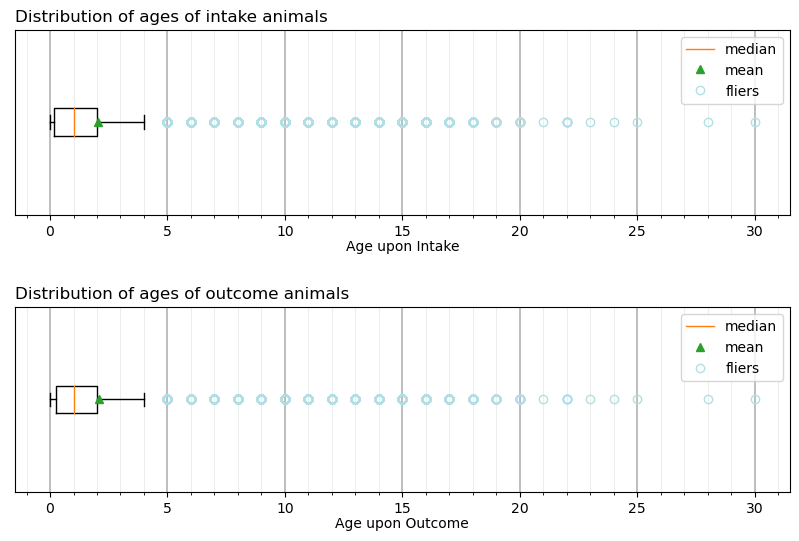

In [14]:
fig, ax = plt.subplots(2,1,figsize=(10,6))
fig.subplots_adjust(hspace=0.5)

ax[0]=box(ax[0],"intake", "Age upon Intake" , intakes)
ax[1]=box(ax[1], "outcome" , "Age upon Outcome", outcomes)
plt.show()

In [15]:
age = "Age upon Outcome"
print("Maximum {} of an animal was {} years, its name was {} and it was a {}.".format(
    age,
    int(outcomes[age].max()),
    outcomes["Name"][outcomes[age] == outcomes[age].max()].item(),
    outcomes["Outcome Type"][outcomes[age] == outcomes[age].max()].item()))

Maximum Age upon Outcome of an animal was 30 years, its name was Sunshine and it was a Transfer.


Is we can see, there is not much of a change between the distribution of ages of income and outcome animals. The mean shifted slightly, median stayed the same. Even the max age stayed the same, because the old bird was transfered away.

In [16]:
def dt_hist(axes , df , to_print ):
    col = "DateTime"
    # bins = 8 years and 12 months in each + a couple of months
    n, bins, patches = axes.hist(df[col], bins= 12*8+7, range=(df[col].min(),"2022-04-30 00:00:00"), color="powderblue")
    #12 months in a year
    axes.xaxis.set_minor_locator(ticker.AutoMinorLocator(12))
    
    axes.set_title("Distribution of the number of {} animals in time".format(to_print))
    
    #color coding max and min values
    max_patch = np.argmax(n)
    min_patch = np.argmin(n)
    plt.setp(patches[min_patch], 'facecolor', 'lightcoral')
    plt.setp(patches[max_patch], 'facecolor', 'palegreen')
    
    axes.grid(axis="x", color="black", alpha=.2 , linewidth=0.5)
    
    axes.legend([patches[max_patch],patches[min_patch]], ["most animals {}".format(to_print),"least animals {}".format(to_print)])

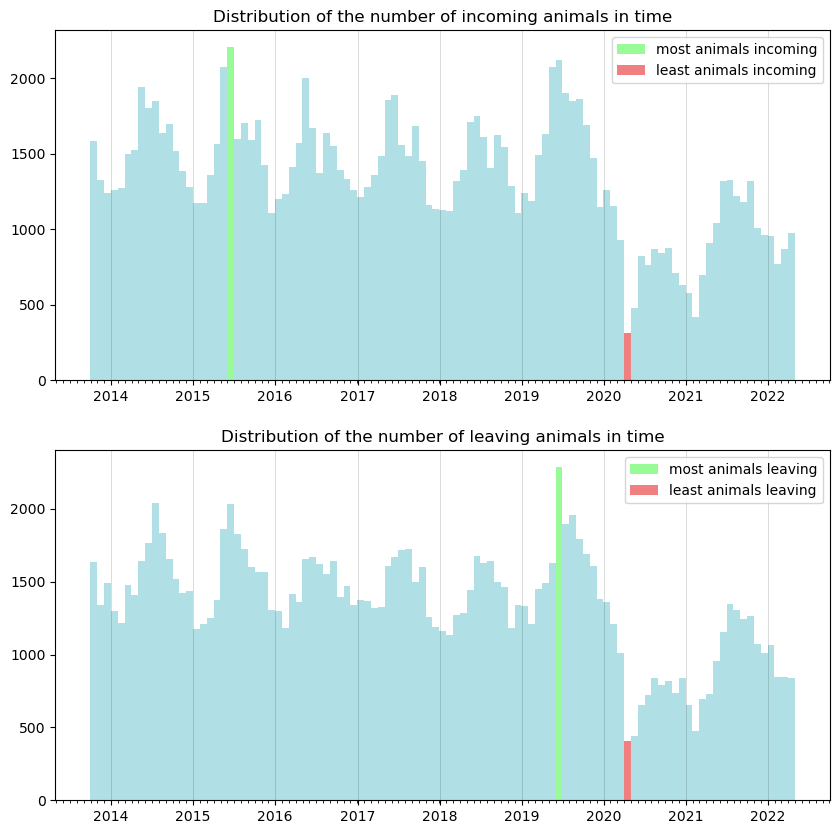

In [17]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

dt_hist(ax[0],intakes, "incoming")
dt_hist(ax[1],outcomes, "leaving")
plt.show()

As we can see from the histograms, there was a big dip in the beggining of the 2020 year, possibly because of covid pandemic. And the traffic did not recover to the previous levels since then. Both max levels of traffic were in June and there was a recurring theme of generally higher traffic in the summer and dips in winter. \
I did not really feel like finding mean and median for these values is worth it, sice these are date values, where, univariant statistics probably would not really tell us anything.

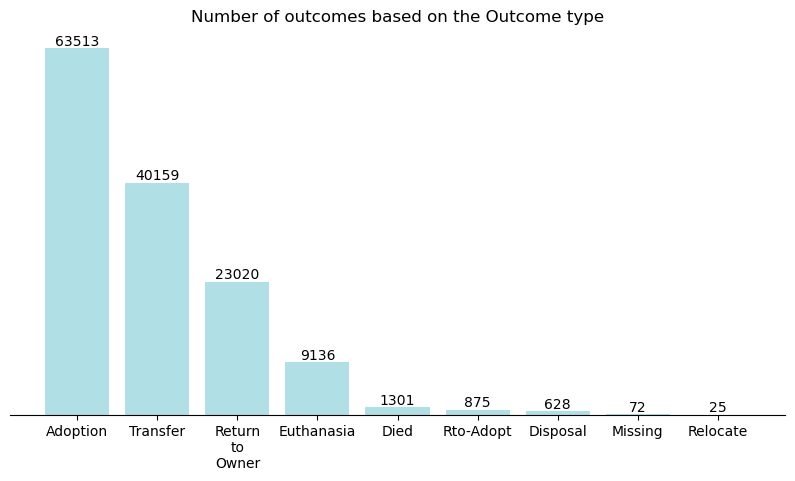

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

#Setting the format of labels so they wrap around if too long
labels = [ label.replace(' ', '\n') for label in outcomes["Outcome Type"].value_counts().index ]
rects = ax.bar(labels,outcomes["Outcome Type"].value_counts(),color="powderblue")

ax.set_ylabel('Frequency of outcome')

#turning off spines ofr better visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Number of outcomes based on the Outcome type")

ax.yaxis.set_visible(False)

ax.bar_label(rects)
plt.show()

In [19]:
#Saves the name with the highest occurence, because value_counts() returns sorted count of each value in the dataframe
most_com_name = intakes['Name'].value_counts().index[0]
print("The most common name in the Intakes was {}".format(most_com_name))
print()

#takes all names that start with an F, quite a wild code, but did not find a way to do it better
least_com_names = [x for x in intakes['Name'].value_counts(ascending=True).loc[lambda x : x==1].index if x[0]=='F' ]
print("The names that occured only once in the Intakes and started with and \"F\" were:\n" + '\n'.join(least_com_names))


The most common name in the Intakes was Max

The names that occured only once in the Intakes and started with and "F" were:
Fairy
Fiver
Flowtron
Falcon
Fluffy Fluff
Faraon
Fufy
Flakey
Fico
Fat Louie
Feral #3
Felipe Rabbi
Flufferton
Finton
Frassina
Fric
Fen
Frog
Fluffy Butt
Fudge Brownie
F
Fender
Fiby
Fantasma
Freddie Mercury
Fayah
Firelord Zuko
Fancee
Felix Jupe
Fossil
Fred Astaire
Florentino
Foxy James
Fonzie
Ferulais
Frida Luna
Foxy Mae
Florian
Fernie
Filbert
Fanning
Fuzzyball
Fluffer
Flea
Fitzgerald
Finesse
Firulin
Foxy Brown
Fugi
Fawkes
Faux
Fate
Flowery
Fe
Flour
Fritos
Ferdinand Fi
Frijol
Favor
Flow
Foo Foo
Fizzgig
Faro
Firulias
Freebee
Ferdy
Farquad
Fabi
Fenek
Firecat
Fudge
France
Fraulein
Flower Pot
Freckle
Friend Called Five
Fruity
Firo
Feliz
Flappy
Faye Bunaway
Forester
Fat Fat
Flynn Ryder
Ferbie
Fusilli
Ficus
Fofinho
Frisk
Fence
Fragle
Fawn
Firus
Frazetta
Fee Fee
Fleck
Fieryo
Fredrick
Francine
Fievel
Fatty
Faneto
Fungus
Furgus Mckit
Feelo
Fetcher
Frumpkin
Fonka
Fat Guy
Foxxy


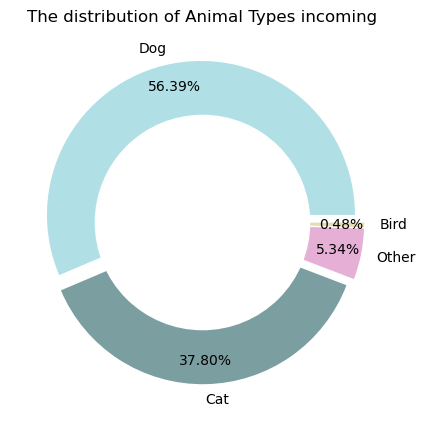

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
# adding livestock to the Other animal type for this visualization, because there are very few livestock animals and it
# was causing problems in the graph
livestock_is_other = intakes.copy()
livestock_is_other["Animal Type"] = np.where( intakes["Animal Type"] != 'Livestock', intakes["Animal Type"] , 'Other' )

values = livestock_is_other["Animal Type"].value_counts()
labels = livestock_is_other["Animal Type"].unique()
colors = ['powderblue', '#7b9fa1', '#e6b0d6', '#e6dcb0']
#explode makes the values more separate
ax.pie( values ,labels=labels, colors=colors ,explode=[0.05 for x in labels],autopct='%1.2f%%',pctdistance=0.85)

ax.set_title("The distribution of Animal Types incoming")

#code for the inner circle borrowed from: https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/ 
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

Text(0.5, 1.0, 'Average outcome age of animals')

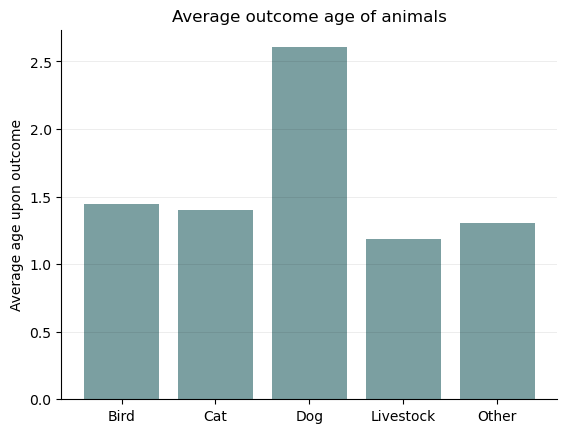

In [21]:
fig, ax = plt.subplots()

#creating series of animal types and their average age upon outcome
avg_ages = outcomes.groupby("Animal Type")["Age upon Outcome"].mean()

ax.bar(x=avg_ages.index,height=avg_ages,color="#7b9fa1")
ax.set_ylabel("Average age upon outcome")
#not adding label for animal type because it would be more cluttered and in my opinion it is obvious what the x-axis represents

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis="y", color="black", alpha=.1 , linewidth=0.5)

ax.set_title("Average outcome age of animals")

# <font color='orange'> Given questions </font>

### <font color='orange'> Q1 </font>
Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou?

In [22]:
#method for getting a dataframe of one volumn based on another one
def based_of ( intakes , outcomes , what , based_of_this ):
    #only taking animals that occured once in each dataset
    unique_intakes = intakes.drop_duplicates(subset=["Animal ID"],keep=False)
    unique_outcomes = outcomes.drop_duplicates(subset=["Animal ID"],keep=False)
    #join
    unique_joined = pd.merge(unique_intakes, unique_outcomes, on='Animal ID', how='inner')
    
    #grouping the valules
    unique_grouped = unique_joined.groupby(what)[based_of_this]
    unique_grouped = unique_grouped.value_counts().reset_index()
    
    #renaming the values for better understandability
    unique_grouped = unique_grouped.rename(columns={"level_1": based_of_this, based_of_this: "count"})

    #getting percentages of each group
    percent = unique_grouped.groupby(what)['count'].transform(lambda x: x/x.sum())
    unique_grouped = unique_grouped.assign(Chance = percent)
    return unique_grouped

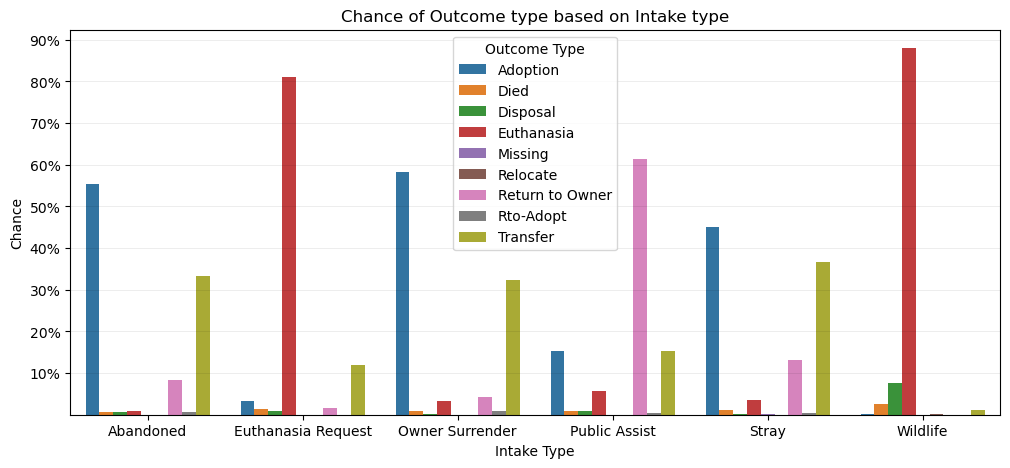

In [23]:
fig, ax = plt.subplots(figsize=(12,5))

what = "Intake Type"
based_of_this = "Outcome Type"
based = based_of(intakes,outcomes,what,based_of_this)

sns.barplot(data=based,x=what,y="Chance",hue=based_of_this)
    
ax.set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.grid(axis="y", color="black", alpha=.1 , linewidth=0.5)
ax.set_title("Chance of Outcome type based on Intake type")

plt.show()

As we can see from the graph above the Outcome does indeed depend on the Intake Type. For example if the Intake Type is Wildlife, there is almost 90% chance, that the outcome will be Euthanasia.

### <font color='orange'> Q2 </font>
Hraje věk zvířete roli při adopci?

C:\Users\vince\AppData\Local\Temp\ipykernel_41264\3887033516.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Less than a year','1 year', '2 years', '3 years', '4 years','More than 4 years'])


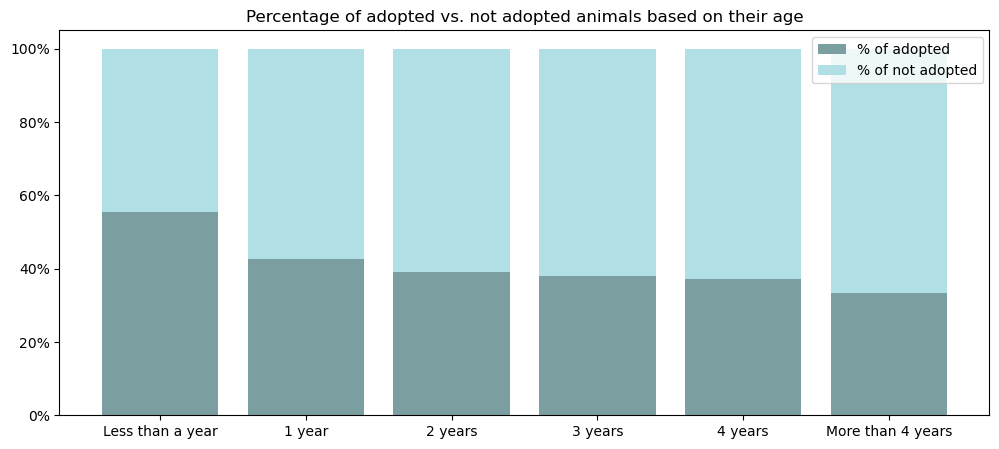

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
changed_outcomes = outcomes.copy()

#create another row with cut up ages for grouping
bins = [0,0.99,1,2,3,4,100]
group_names=[0,1,2,3,4,100]
changed_outcomes['age_leq_than']=pd.cut(outcomes['Age upon Outcome'],bins,labels=group_names)

#grouping animals into different ages 
grouped_outcomes = changed_outcomes.groupby("age_leq_than")["Outcome Type"]    
grouped_df = grouped_outcomes.value_counts(normalize=True).reset_index()

#only getting the adopted ones
adopted = grouped_df[grouped_df["level_1"]=="Adoption"]
#so the plot formats normally and does not spread like crazy
adopted = adopted.astype({"age_leq_than":"string"})

#plotting the stacked barplot
patches1 = ax.bar(x=adopted["age_leq_than"],height=adopted["Outcome Type"],color="#7b9fa1")
patches2 = ax.bar(x=adopted["age_leq_than"],height=1-adopted["Outcome Type"],color="powderblue",bottom=adopted["Outcome Type"])

ax.set_xticklabels(['Less than a year','1 year', '2 years', '3 years', '4 years','More than 4 years'])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.legend([patches1,patches2], ["% of adopted","% of not adopted"])

ax.set_title("Percentage of adopted vs. not adopted animals based on their age")

plt.show()

As you can see from the graph above, there is a lower fraction of animals adopted the older they get. So I would say that age does play a role in Adoption.

### <font color='orange'> Q3 </font>
Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

In [25]:
def month_from_date (row):
    return row["DateTime"].month

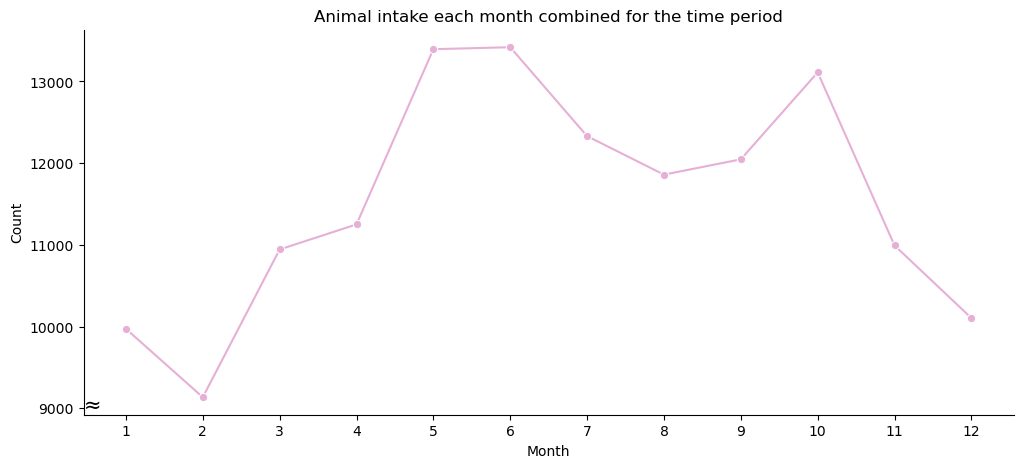

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
month_intakes = intakes.copy()
#adding a new column with month that the animal was taken to the shelter
month_intakes['Month'] = month_intakes.apply(lambda row: month_from_date(row), axis=1)

#counting up all intakes for each month
months = month_intakes.groupby('Month')["Animal ID"].count().reset_index()
months = months.rename(columns={"Animal ID": "Count"})

sns.lineplot(data=months,x='Month',y='Count',marker="o",color='#e6b0d6')

ax.set_title("Animal intake each month combined for the time period")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding the double tilda to show that data does not start at 0
ax.text(0,0,"≈",fontsize=15,verticalalignment='bottom',horizontalalignment='left',transform=ax.transAxes)
ax.set_xticks([x for x in range(1,13)])

plt.show()

As we can see, there are months, like May and June, where the intake was overally higher, than for example January or February. This graph does not start on 0 to show better the changes in months. There is the double tilda suymbol so the reader can notice it better and read the graph accordingly.  
There were more ways to do this visualization, like plotting each year individually or using a heatmap. I chose this, because I think it equally answers the question.

# <font color='orange'> Own questions </font>

### <font color='orange'> Q1 </font>
What is the percentage of animals of each type that returned to the shelter at least once?

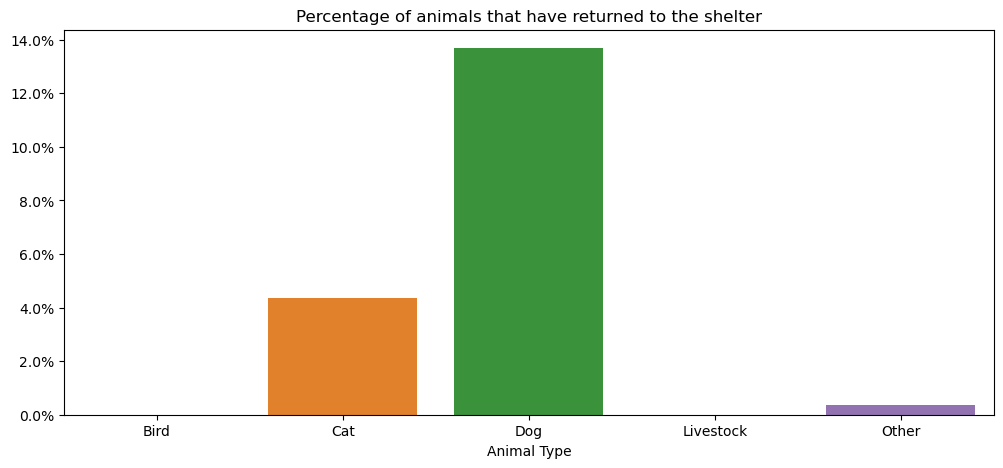

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
#find all animals that came in the shelter more than once
duplicated = intakes[intakes.duplicated('Animal ID')]
#take only one instance of each animal that came in the shelter more than once so that they are not counted more than once
duplicated_unique = duplicated.drop_duplicates(subset=["Animal ID"],keep='first')
unique = intakes.drop_duplicates(subset=["Animal ID"],keep='first')

grouped_returning = duplicated_unique.groupby("Animal Type")["Animal ID"].count().reset_index()
#taking only unique animals as a full set, so the percentages add up
grouped_all = unique.groupby("Animal Type")["Animal ID"].count().reset_index()

grouped_returning['Percent'] = grouped_returning['Animal ID']/grouped_all['Animal ID']
grouped_returning = grouped_returning.drop([0,3])

sns.barplot(data=grouped_returning,x="Animal Type",y="Percent")

ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(ylabel=None)
ax.set_title("Percentage of animals that have returned to the shelter")

plt.show()

It would have been possible to take out Bird and Livestock types since they are 0, but in the end I left them in, so the reader is not confused as to what happened with those categories.

### <font color='orange'> Q2 </font>
How many animals that came in each year were in the shelter at the end of the year?  

In [28]:
#takes a year from a datetime format
def year_from_date (row):
    return row["DateTime"].year

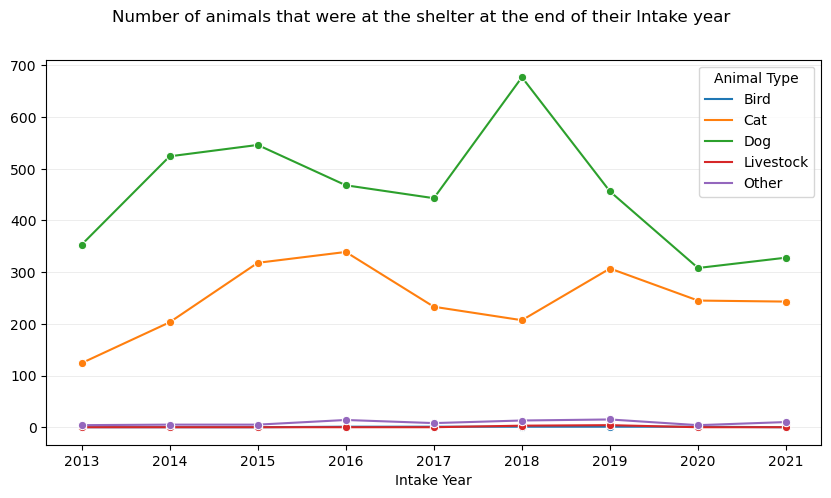

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

year_intakes = intakes.copy()
year_outcomes = outcomes.copy()
year_intakes['Intake Year'] = year_intakes.apply(lambda row: year_from_date(row), axis=1)
year_outcomes['Outcome Year'] = year_outcomes.apply(lambda row: year_from_date(row), axis=1)

#for better convenience only takes the last intake and outcome of all animals
unique_intakes = year_intakes.drop_duplicates(subset=["Animal ID"],keep='last')
unique_outcomes = year_outcomes.drop_duplicates(subset=["Animal ID"],keep='last')
unique_joined = pd.merge(unique_intakes, unique_outcomes, on='Animal ID', how='right')

#only taking animals, that have a higher outcome year than income. This is the subset that I want to visualize
staying_animals = unique_joined[unique_joined["Intake Year"] < unique_joined["Outcome Year"]]

#for some reason year is a float so I cahnge it to int for convenience
staying_animals = staying_animals.astype({"Intake Year":"int"})
staying_animals = staying_animals.rename(columns={"Animal Type_x": "Animal Type"})

#since I wanted a lineplot I had to count up all the different cominations usig groupby
staying_animals = staying_animals.groupby(['Intake Year','Animal Type'], as_index=False)['Animal ID'].count()
staying_animals = staying_animals.pivot('Intake Year','Animal Type', 'Animal ID')

sns.lineplot(data=staying_animals,marker="o",dashes=False)

ax.grid(axis="y", color="black", alpha=.1 , linewidth=0.5)
fig.suptitle('Number of animals that were at the shelter at the end of their Intake year')

plt.show()

### <font color='orange'> Q3 </font>
How was the Outcome type based on Intake condition?

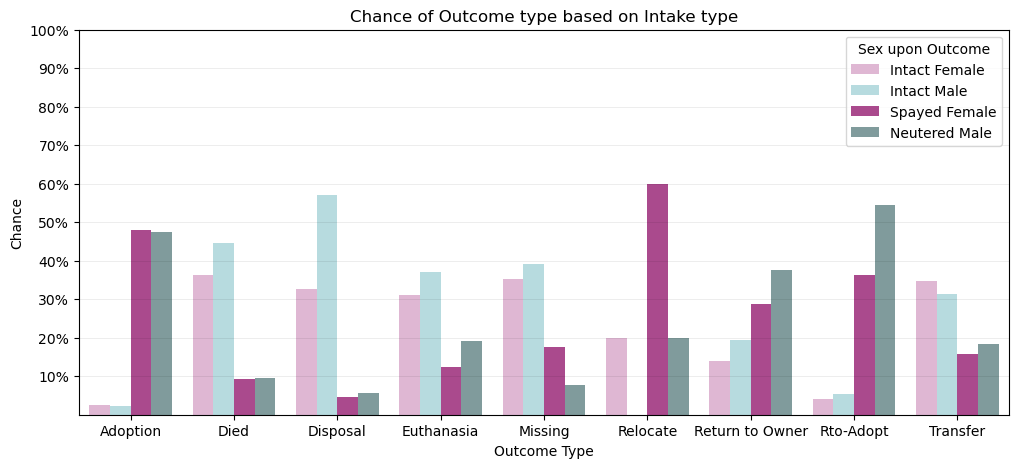

In [30]:
fig, ax = plt.subplots(figsize=(12,5))

what = "Outcome Type"
based_of_this = "Sex upon Outcome"
#again reusing method for taking one var based on another
based = based_of(outcomes,intakes,what,based_of_this)

hue_order=["Intact Female","Intact Male","Spayed Female","Neutered Male"]
sns.barplot(data=based,x=what,y="Chance",hue=based_of_this,palette=["#e6b0d6","powderblue","#ba3a94","#7b9fa1"],hue_order=hue_order)
    
ax.set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.grid(axis="y", color="black", alpha=.1 , linewidth=0.5)
ax.set_title("Chance of Outcome type based on Sex upon Outcome")

plt.show()

From this graph we can see a couple of insteresting statistics:
* Most adopted animals were neutered or spayed
* Most animals that died were Intact (This is probably due to the fact that there was not a point in castration.)
* There were more male animals that recieved Euthanasia
* There are not big differences in most categories based on sex. The data are more based on the castration.

# <font color='orange'> Conclusion </font>
I started to work with matplotlib directly in the beggining, but switched to seaborn since I found out it is only a wrapper for matplotlib and it has some nice functionalities. Hope that is ok. :)